In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from sklearn.preprocessing import normalize
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import math

In [ ]:
Employee_designation=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/Data/Employee_Designation.csv')
print(Employee_designation.shape)
Employee_designation.head()

(1000, 3)


,Eid,Designation,Ename
0,1,Programmer-3,Dana Bond
1,2,Team Lead,Jesus Hampton
2,3,Team Lead,Teresa Munoz
3,4,Team Lead,Annette Dipietro
4,5,Deployment-2,Jennifer Fortner


In [ ]:
Final_Employees_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/Data/Final_Employees_Data.csv')
print(Final_Employees_data.shape)
Final_Employees_data.head()

(1000, 17)


,Eid,Ename,Experience,Total_projects,Rating,Area_of_Interest_1,Area_of_Interest_2,Area_of_Interest_3,Language1,Language2,Language3,AI_project_count,ML_project_count,JS_project_count,Java_project_count,DotNet_project_count,Mobile_project_count
0,1,Dana Bond,2,2,1.000000,DotNet,JS,AI,English,Hindi,Tamil,0,1,1,0,0,0
1,2,Jesus Hampton,9,13,1.444444,DotNet,AI,JS,English,Hindi,Malayalam,4,3,0,2,3,1
2,3,Teresa Munoz,15,16,1.066667,ML,JS,Java,English,Kannada,Chinese,3,3,1,3,5,1
3,4,Annette Dipietro,18,19,1.055556,DotNet,ML,Mobile,English,Chinese,Tamil,4,4,2,3,3,3
4,5,Jennifer Fortner,22,15,0.681818,Mobile,Java,JS,English,Chinese,Telugu,3,4,3,1,1,3


In [ ]:
Designation_Prediction_data=pd.merge(Employee_designation,Final_Employees_data, on='Eid')
Designation_Prediction_data=Designation_Prediction_data.drop(['Ename_y'],axis=1)
# Designation_Prediction_data=Designation_Prediction_data.rename(columns = {'Ename_x':'Employee_Name'}, inplace = True)
print(Designation_Prediction_data.shape)
Designation_Prediction_data.head()

(1000, 18)


,Eid,Designation,Ename_x,Experience,Total_projects,Rating,Area_of_Interest_1,Area_of_Interest_2,Area_of_Interest_3,Language1,Language2,Language3,AI_project_count,ML_project_count,JS_project_count,Java_project_count,DotNet_project_count,Mobile_project_count
0,1,Programmer-3,Dana Bond,2,2,1.000000,DotNet,JS,AI,English,Hindi,Tamil,0,1,1,0,0,0
1,2,Team Lead,Jesus Hampton,9,13,1.444444,DotNet,AI,JS,English,Hindi,Malayalam,4,3,0,2,3,1
2,3,Team Lead,Teresa Munoz,15,16,1.066667,ML,JS,Java,English,Kannada,Chinese,3,3,1,3,5,1
3,4,Team Lead,Annette Dipietro,18,19,1.055556,DotNet,ML,Mobile,English,Chinese,Tamil,4,4,2,3,3,3
4,5,Deployment-2,Jennifer Fortner,22,15,0.681818,Mobile,Java,JS,English,Chinese,Telugu,3,4,3,1,1,3


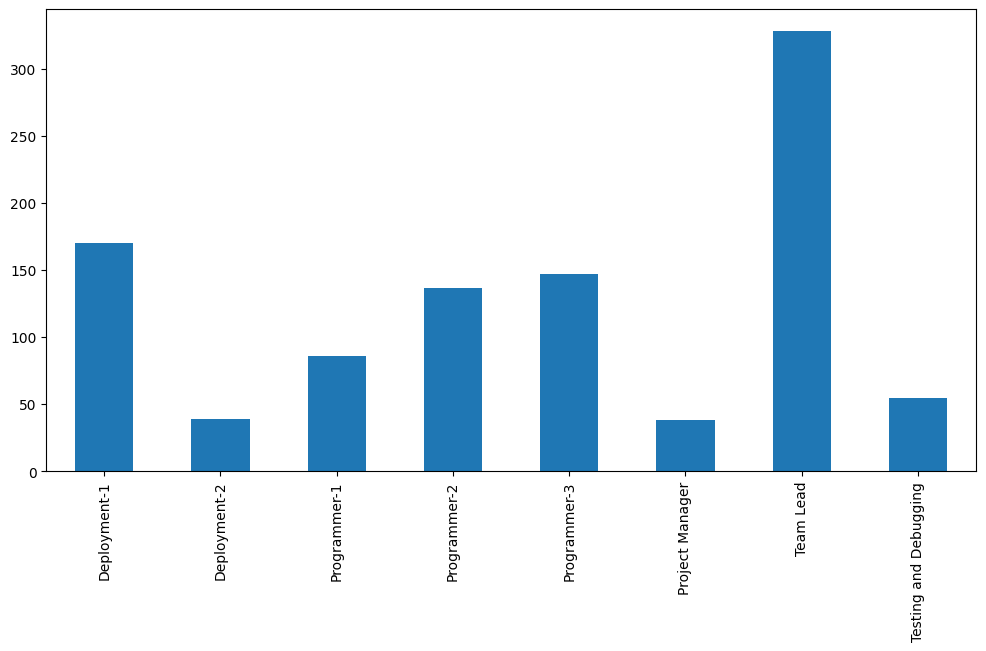

In [ ]:
#Distribution of different categories present in the dataset
Designation_Prediction_data['Designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
task1_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/taks1_data.csv')
print(task1_data.shape)
task1_data.head()

(698, 18)


,Eid,Designation,Ename_x,Experience,Total_projects,Rating,Area_of_Interest_1,Area_of_Interest_2,Area_of_Interest_3,Language1,Language2,Language3,AI_project_count,ML_project_count,JS_project_count,Java_project_count,DotNet_project_count,Mobile_project_count
0,6,Programmer-1,Mary Todd,7,13,1.857143,AI,Java,ML,English,Chinese,Hindi,2,5,1,1,1,3
1,11,Programmer-1,Shannon Berryhill,7,17,2.428571,JS,ML,Mobile,English,Japenese,Tamil,2,3,4,7,0,1
2,23,Programmer-1,John Pina,6,19,3.166667,ML,Java,DotNet,English,Telugu,Kannada,2,3,3,1,4,6
3,57,Programmer-1,Yvonne Caron,8,16,2.000000,Java,Mobile,AI,English,Tamil,Chinese,3,4,4,1,4,0
4,77,Programmer-1,Brian Sparks,8,18,2.250000,ML,DotNet,Mobile,English,Malayalam,Japenese,3,1,3,3,4,4


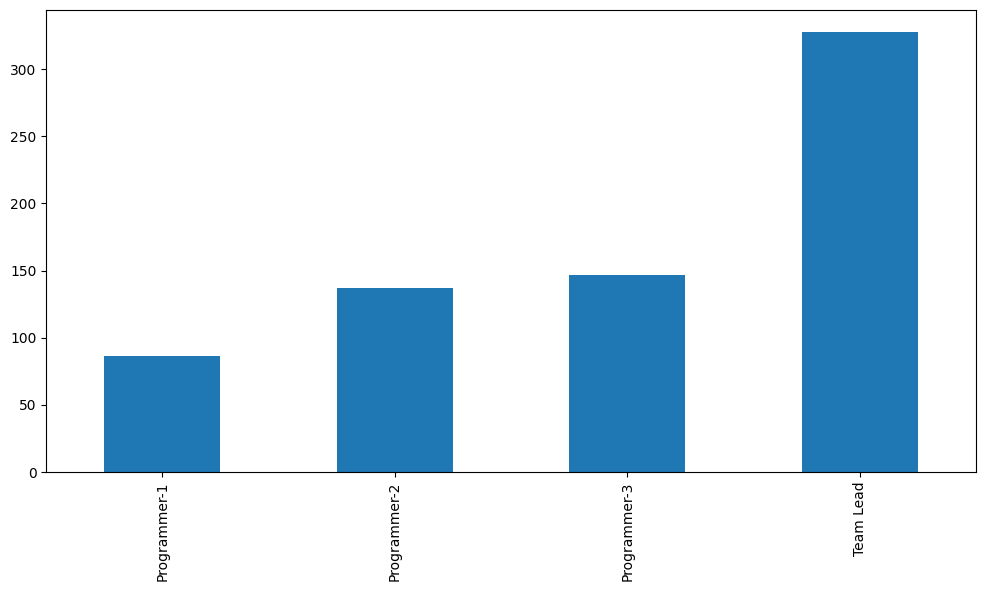

In [ ]:
#Distribution of different categories present in the dataset
task1_data['Designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
task2_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/taks2_data.csv')
print(task2_data.shape)
task2_data.head()

(302, 18)


,Eid,Designation,Ename_x,Experience,Total_projects,Rating,Area_of_Interest_1,Area_of_Interest_2,Area_of_Interest_3,Language1,Language2,Language3,AI_project_count,ML_project_count,JS_project_count,Java_project_count,DotNet_project_count,Mobile_project_count
0,17,Testing and Debugging,Charles Vine,15,6,0.400000,AI,Mobile,ML,English,Malayalam,Telugu,2,1,2,1,0,0
1,34,Testing and Debugging,Sandra Mosher,13,6,0.461538,ML,DotNet,AI,English,Chinese,Hindi,2,1,1,0,1,1
2,42,Testing and Debugging,Felicia Lampe,13,12,0.923077,Mobile,AI,DotNet,English,Japenese,Kannada,6,2,1,0,1,2
3,49,Testing and Debugging,James Copper,14,5,0.357143,Java,JS,AI,English,Tamil,Telugu,0,0,1,0,2,2
4,116,Testing and Debugging,Rosalyn Garden,12,6,0.500000,ML,DotNet,Mobile,English,Kannada,Tamil,2,2,0,0,1,1


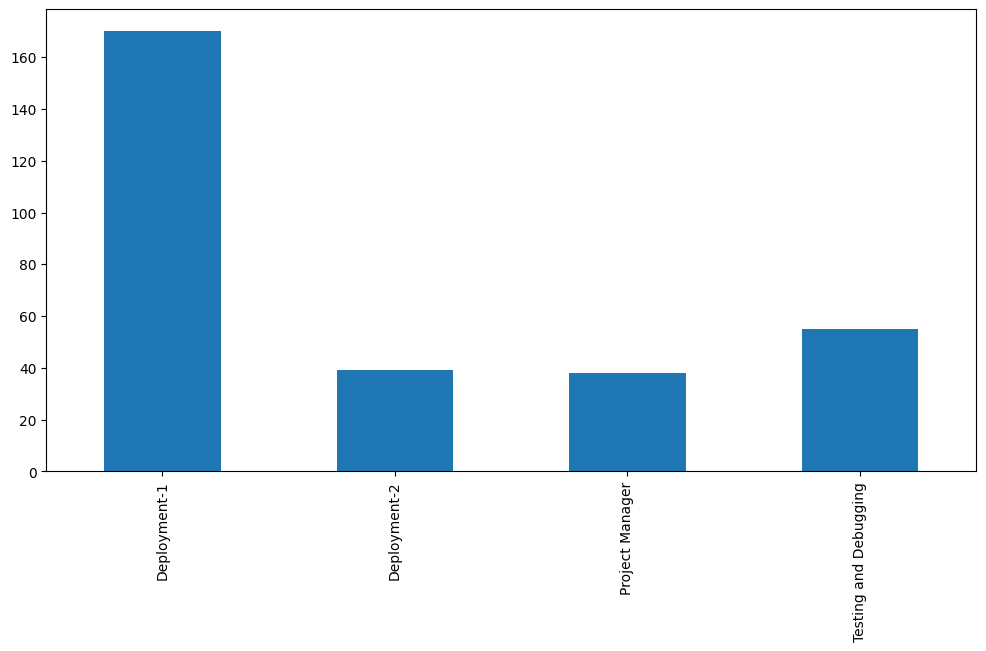

In [ ]:
#Distribution of different categories present in the dataset
task2_data['Designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
#These are all the various job categories present in the dataset
categories=np.sort(task1_data['Designation'].unique())
number_of_classes=len(categories)

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Designation']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


#These are all the various Areas of Interest of the employees present in the dataset
areas_of_interest=np.sort(task1_data['Area_of_Interest_1'].unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Area_of_Interest_1']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Area_of_Interest_2']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Area_of_Interest_3']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])

#These are all the various Languages present in the dataset
Languages=np.sort(pd.concat([task1_data['Language1'],task1_data['Language2'],task1_data['Language3']]).unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Language1']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Language2']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Language3']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])

task1_data=task1_data.drop('Ename_x',axis=1)

label1=task1_data['Designation']
task1_data=task1_data.drop('Designation',axis=1)
task1_data = normalize(task1_data, norm='l1', axis=0)

In [ ]:
#These are all the various job categories present in the dataset
categories=np.sort(task2_data['Designation'].unique())
number_of_classes=len(categories)

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Designation']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


#These are all the various Areas of Interest of the employees present in the dataset
areas_of_interest=np.sort(task2_data['Area_of_Interest_1'].unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Area_of_Interest_1']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Area_of_Interest_2']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Area_of_Interest_3']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])

#These are all the various Languages present in the dataset
Languages=np.sort(pd.concat([task2_data['Language1'],task2_data['Language2'],task2_data['Language3']]).unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Language1']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Language2']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Language3']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])

task2_data=task2_data.drop('Ename_x',axis=1)

label2=task2_data['Designation']
task2_data=task2_data.drop('Designation',axis=1)
task2_data = normalize(task2_data, norm='l1', axis=0)

In [ ]:
#Splitting the training and test dataset shape
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(task1_data,label1,random_state=421212, test_size=0.2,shuffle=True)
print('Shape of the dataset before oversampling')
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)

Shape of the dataset before oversampling
(558, 16)
(558,)
(140, 16)
(140,)


In [ ]:
#Splitting the training and test dataset shape
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(task2_data,label2,random_state=421212, test_size=0.2,shuffle=True)
print('Shape of the dataset before oversampling')
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

Shape of the dataset before oversampling
(241, 16)
(241,)
(61, 16)
(61,)


In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train1,Y_train1 = oversample.fit_resample(X_train1, Y_train1)
print('Shape of the dataset after oversampling')
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)

Shape of the dataset after oversampling
(1044, 16)
(1044,)
(140, 16)
(140,)


In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train2,Y_train2 = oversample.fit_resample(X_train2, Y_train2)
print('Shape of the dataset after oversampling')
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

Shape of the dataset after oversampling
(536, 16)
(536,)
(61, 16)
(61,)


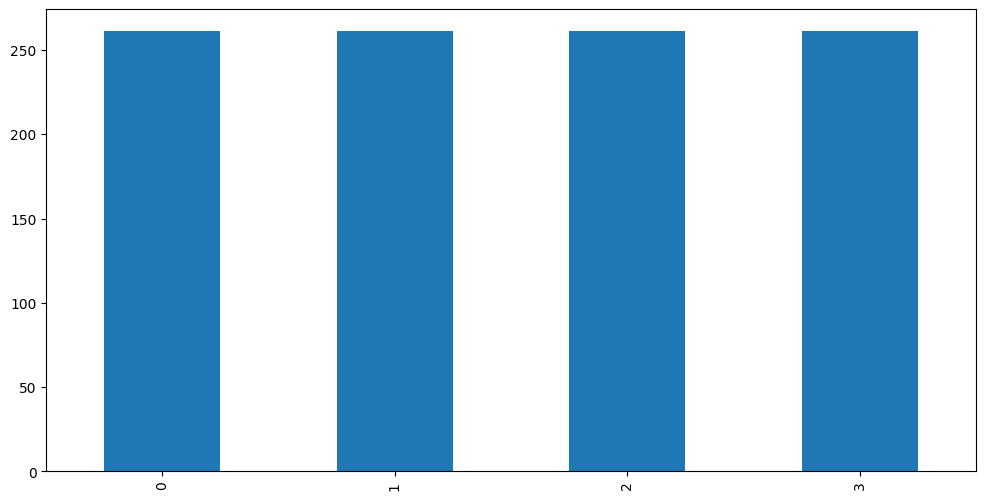

In [ ]:
#Distribution of different categories present in the dataset
Y_train1.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

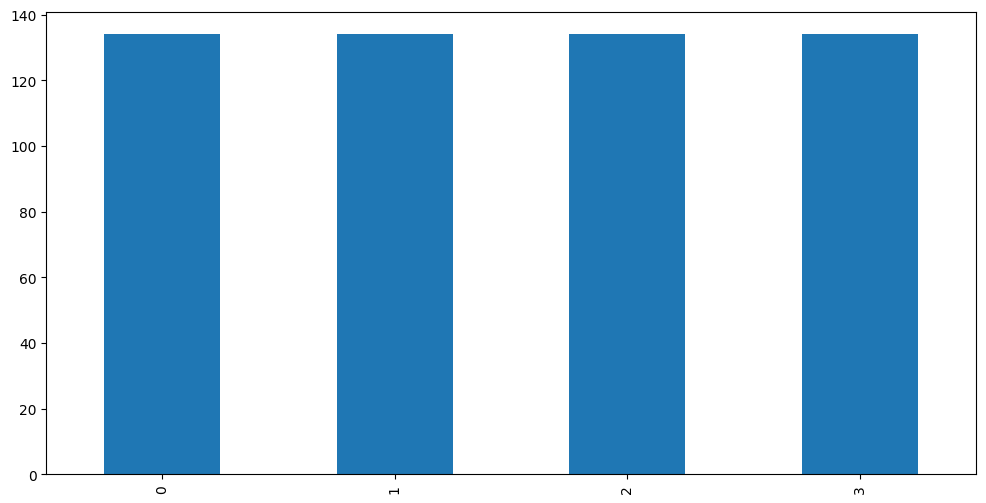

In [ ]:
#Distribution of different categories present in the dataset
Y_train2.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
X_train1=np.asarray(X_train1)
Y_train1=np.asarray(Y_train1)
X_test1=np.asarray(X_test1)
Y_test1=np.asarray(Y_test1)
X_train1 = np.asarray(torch.tensor(X_train1, dtype=torch.float32))
Y_train1 = np.asarray(torch.tensor(Y_train1, dtype=torch.float32))
X_test1 = np.asarray(torch.tensor(X_test1, dtype=torch.float32))
Y_test1 = np.asarray(torch.tensor(Y_test1, dtype=torch.float32))

In [ ]:
X_train2=np.asarray(X_train2)
Y_train2=np.asarray(Y_train2)
X_test2=np.asarray(X_test2)
Y_test2=np.asarray(Y_test2)
X_train2 = np.asarray(torch.tensor(X_train2, dtype=torch.float32))
Y_train2 = np.asarray(torch.tensor(Y_train2, dtype=torch.float32))
X_test2 = np.asarray(torch.tensor(X_test2, dtype=torch.float32))
Y_test2 = np.asarray(torch.tensor(Y_test2, dtype=torch.float32))

In [ ]:
# task 1
task_1 = [(X_train1, Y_train1), (X_test1, Y_test1)]

# task 2
task_2 = [(X_train2, Y_train2), (X_test2, Y_test2)]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network model
class ComplexMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.5):
        super(ComplexMLP, self).__init__()

        # Input layer
        layers = [nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), nn.Dropout(p=dropout_rate)]

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            layers += [nn.Linear(hidden_sizes[i-1], hidden_sizes[i]), nn.ReLU(), nn.Dropout(p=dropout_rate)]

        # Output layer
        layers += [nn.Linear(hidden_sizes[-1], output_size)]

        # Combine the layers
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Hyperparameters
input_size = 16
hidden_sizes = [128, 64, 32]  # Adjust these sizes as needed
output_size = 8
dropout_rate = 0.2 # Adjust as needed
fisher_dict = {}
optpar_dict = {}
ewc_lambda = 10**3
batch_size=128
tasks = [task_1, task_2]

# Initialize the model, loss function, and optimizer
model = ComplexMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# switch to False to use CPU
use_cuda = True

use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");
torch.manual_seed(1);

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def on_task_update(task_id, x_mem, t_mem):

  model.train()
  fisher_dict[task_id] = {}
  optpar_dict[task_id] = {}
  count=0
  for name, param in model.named_parameters():
    fisher_dict[task_id][name] = param.data*0.0
  for start in range(0, len(t_mem)-1, batch_size):
      optimizer.zero_grad()
      count+=1
      # print(len(t_mem),len(x_mem))
      end = start + batch_size
      x, y = torch.from_numpy(x_mem[start:end]), torch.from_numpy(t_mem[start:end]).long()
      x, y = x.to(device), y.to(device)
      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()
      # gradients accumulated can be used to calculate fisher
      for name, param in model.named_parameters():
        fisher_dict[task_id][name] += param.grad.data.clone().pow(2)
  for name, param in model.named_parameters():
        optpar_dict[task_id][name] = param.data.clone()
        fisher_dict[task_id][name] = fisher_dict[task_id][name]/count

def train_ewc(model, device, task_id, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, batch_size):
        end = start + batch_size
        x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        output = model(x)
        loss = F.cross_entropy(output, y)

        ### magic here! :-)
        for task in range(task_id):
            for name, param in model.named_parameters():
                fisher = fisher_dict[task][name]
                optpar = optpar_dict[task][name]
                loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda

        loss.backward()
        optimizer.step()

    # After each epoch, evaluate and print metrics
    train_metrics = evaluate_metrics(model, device, x_train, t_train)
    # print(f'Train Epoch: {epoch}\tLoss: {loss.item():.6f}\tPrecision: {train_metrics["precision"]:.4f}\tRecall: {train_metrics["recall"]:.4f}\tF1 Score: {train_metrics["f1"]:.4f}')

def evaluate_metrics(model, device, x_data, t_data):
    model.eval()
    all_preds = []
    all_labels = []

    for start in range(0, len(t_data)-1, batch_size):
        end = start + batch_size
        with torch.no_grad():
            x, y = torch.from_numpy(x_data[start:end]), torch.from_numpy(t_data[start:end]).long()
            x, y = x.to(device), y.to(device)
            output = model(x)

            # Convert predictions to numpy arrays
            preds = output.argmax(dim=1).cpu().numpy()
            labels = y.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return {'precision': precision, 'recall': recall, 'f1': f1}

def train(model, device, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, batch_size):
      end = start + batch_size
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()
      optimizer.step()
      #print(loss.item())
    # print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

def test(model, device, x_test, t_test):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []
    all_labels = []

    for start in range(0, len(t_test)-1, batch_size):
        end = start + batch_size
        with torch.no_grad():
            x, y = torch.from_numpy(x_test[start:end]), torch.from_numpy(t_test[start:end]).long()
            x, y = x.to(device), y.to(device)
            output = model(x)
            test_loss += F.cross_entropy(output, y).item()  # sum up batch loss
            pred = output.max(1, keepdim=True)[1]  # get the index of the max logit
            correct += pred.eq(y.view_as(pred)).sum().item()

            # Convert predictions to numpy arrays
            preds = pred.cpu().numpy()
            labels = y.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    test_loss /= len(t_test)

    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(t_test), 100. * correct / len(t_test)))
    print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}\n'.format(precision, recall, f1))

    return 100. * correct / len(t_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
ewc_accs = []
for id, task in enumerate(tasks):
  avg_acc = 0
  print("Training on task: ", id)

  (x_train, t_train), _ = task

  for epoch in range(1, 51):
    train_ewc(model, device, id, x_train, t_train, optimizer, epoch)
  on_task_update(id, x_train, t_train)

  for id_test, task in enumerate(tasks):
    print("Testing on task: ", id_test)
    _, (x_test, t_test) = task
    acc = test(model, device, x_test, t_test)
    avg_acc = avg_acc + acc

  print("Avg acc: ", avg_acc / 3)
  ewc_accs.append(avg_acc / 3)

Training on task:  0
Testing on task:  0
Test set: Average loss: 0.0205, Accuracy: 24/140 (17%)
Precision: 0.0294, Recall: 0.1714, F1 Score: 0.0502

Testing on task:  1
Test set: Average loss: 0.0236, Accuracy: 7/61 (11%)
Precision: 0.0132, Recall: 0.1148, F1 Score: 0.0236

Avg acc:  9.539422326307571
Training on task:  1
Testing on task:  0
Test set: Average loss: 0.0182, Accuracy: 67/140 (48%)
Precision: 0.2290, Recall: 0.4786, F1 Score: 0.3098

Testing on task:  1
Test set: Average loss: 0.0234, Accuracy: 14/61 (23%)
Precision: 0.0527, Recall: 0.2295, F1 Score: 0.0857

Avg acc:  23.602654176424664


# MobileNET

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from sklearn.preprocessing import normalize
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import math

In [ ]:
Employee_designation=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/Data/Employee_Designation.csv')
print(Employee_designation.shape)
Employee_designation.head()

In [ ]:
Final_Employees_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/Data/Final_Employees_Data.csv')
print(Final_Employees_data.shape)
Final_Employees_data.head()

In [ ]:
Designation_Prediction_data=pd.merge(Employee_designation,Final_Employees_data, on='Eid')
Designation_Prediction_data=Designation_Prediction_data.drop(['Ename_y'],axis=1)
# Designation_Prediction_data=Designation_Prediction_data.rename(columns = {'Ename_x':'Employee_Name'}, inplace = True)
print(Designation_Prediction_data.shape)
Designation_Prediction_data.head()

In [ ]:
#Distribution of different categories present in the dataset
Designation_Prediction_data['Designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
task1_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/taks1_data.csv')
print(task1_data.shape)
task1_data.head()

In [ ]:
#Distribution of different categories present in the dataset
task1_data['Designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
task2_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/IT_Employee_Project_Allocation/taks2_data.csv')
print(task2_data.shape)
task2_data.head()

In [ ]:
#Distribution of different categories present in the dataset
task2_data['Designation'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
#These are all the various job categories present in the dataset
categories=np.sort(task1_data['Designation'].unique())
number_of_classes=len(categories)

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Designation']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


#These are all the various Areas of Interest of the employees present in the dataset
areas_of_interest=np.sort(task1_data['Area_of_Interest_1'].unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Area_of_Interest_1']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Area_of_Interest_2']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Area_of_Interest_3']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])

#These are all the various Languages present in the dataset
Languages=np.sort(pd.concat([task1_data['Language1'],task1_data['Language2'],task1_data['Language3']]).unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Language1']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Language2']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])


var_mod = ['Language3']
le = LabelEncoder()
for i in var_mod:
    task1_data[i] = le.fit_transform(task1_data[i])

task1_data=task1_data.drop('Ename_x',axis=1)

label1=task1_data['Designation']
task1_data=task1_data.drop('Designation',axis=1)
task1_data = normalize(task1_data, norm='l1', axis=0)

In [ ]:
#These are all the various job categories present in the dataset
categories=np.sort(task2_data['Designation'].unique())
number_of_classes=len(categories)

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Designation']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


#These are all the various Areas of Interest of the employees present in the dataset
areas_of_interest=np.sort(task2_data['Area_of_Interest_1'].unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Area_of_Interest_1']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Area_of_Interest_2']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Area_of_Interest_3']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])

#These are all the various Languages present in the dataset
Languages=np.sort(pd.concat([task2_data['Language1'],task2_data['Language2'],task2_data['Language3']]).unique())

#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Language1']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Language2']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])


var_mod = ['Language3']
le = LabelEncoder()
for i in var_mod:
    task2_data[i] = le.fit_transform(task2_data[i])

task2_data=task2_data.drop('Ename_x',axis=1)

label2=task2_data['Designation']
task2_data=task2_data.drop('Designation',axis=1)
task2_data = normalize(task2_data, norm='l1', axis=0)

In [ ]:
#Splitting the training and test dataset shape
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(task1_data,label1,random_state=421212, test_size=0.2,shuffle=True)
print('Shape of the dataset before oversampling')
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)

In [ ]:
#Splitting the training and test dataset shape
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(task2_data,label2,random_state=421212, test_size=0.2,shuffle=True)
print('Shape of the dataset before oversampling')
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train1,Y_train1 = oversample.fit_resample(X_train1, Y_train1)
print('Shape of the dataset after oversampling')
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)

In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train2,Y_train2 = oversample.fit_resample(X_train2, Y_train2)
print('Shape of the dataset after oversampling')
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

In [ ]:
#Distribution of different categories present in the dataset
Y_train1.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
#Distribution of different categories present in the dataset
Y_train2.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
X_train1=np.asarray(X_train1)
Y_train1=np.asarray(Y_train1)
X_test1=np.asarray(X_test1)
Y_test1=np.asarray(Y_test1)
X_train1 = np.asarray(torch.tensor(X_train1, dtype=torch.float32))
Y_train1 = np.asarray(torch.tensor(Y_train1, dtype=torch.float32))
X_test1 = np.asarray(torch.tensor(X_test1, dtype=torch.float32))
Y_test1 = np.asarray(torch.tensor(Y_test1, dtype=torch.float32))

In [ ]:
X_train2=np.asarray(X_train2)
Y_train2=np.asarray(Y_train2)
X_test2=np.asarray(X_test2)
Y_test2=np.asarray(Y_test2)
X_train2 = np.asarray(torch.tensor(X_train2, dtype=torch.float32))
Y_train2 = np.asarray(torch.tensor(Y_train2, dtype=torch.float32))
X_test2 = np.asarray(torch.tensor(X_test2, dtype=torch.float32))
Y_test2 = np.asarray(torch.tensor(Y_test2, dtype=torch.float32))

In [ ]:
# task 1
task_1 = [(X_train1, Y_train1), (X_test1, Y_test1)]

# task 2
task_2 = [(X_train2, Y_train2), (X_test2, Y_test2)]

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class UNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(UNet, self).__init__()

        # Encoder layers
        self.enc1 = nn.Linear(input_size, 256)
        self.enc2 = nn.Linear(256, 128)
        self.enc3 = nn.Linear(128, 64)
        self.enc4 = nn.Linear(64, 32)
        self.enc5 = nn.Linear(32, 16)

        # Decoder layers
        self.dec5 = nn.Linear(16, 32)
        self.dec4 = nn.Linear(32, 64)
        self.dec3 = nn.Linear(64, 128)
        self.dec2 = nn.Linear(128, 256)
        self.dec1 = nn.Linear(256, output_size)

    def forward(self, x):
        # Encoding
        x1 = F.relu(self.enc1(x))
        x2 = F.relu(self.enc2(x1))
        x3 = F.relu(self.enc3(x2))
        x4 = F.relu(self.enc4(x3))
        x5 = F.relu(self.enc5(x4))

        # Decoding with skip connections
        x_dec5 = F.relu(self.dec5(x5) + x4)
        x_dec4 = F.relu(self.dec4(x_dec5) + x3)
        x_dec3 = F.relu(self.dec3(x_dec4) + x2)
        x_dec2 = F.relu(self.dec2(x_dec3) + x1)
        x_out = self.dec1(x_dec2)

        return x_out

# Example usage
input_size = 16
output_size = 8

model = UNet(input_size, output_size)

# Hyperparameters
fisher_dict = {}
optpar_dict = {}
ewc_lambda = 10**3
batch_size=512
tasks = [task_1, task_2]

# Initialize the model, loss function, and optimizer
model = UNet(input_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [69]:
# switch to False to use CPU
use_cuda = True
use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");
torch.manual_seed(1)

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

def on_task_update(task_id, x_mem, t_mem):

  model.train()
  fisher_dict[task_id] = {}
  optpar_dict[task_id] = {}
  count=0
  for name, param in model.named_parameters():
    fisher_dict[task_id][name] = param.data*0.0
  for start in range(0, len(t_mem)-1, batch_size):
      optimizer.zero_grad()
      count+=1
      # print(len(t_mem),len(x_mem))
      end = start + batch_size
      x, y = torch.from_numpy(x_mem[start:end]), torch.from_numpy(t_mem[start:end]).long()
      x, y = x.to(device), y.to(device)
      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()
      # gradients accumulated can be used to calculate fisher
      for name, param in model.named_parameters():
        fisher_dict[task_id][name] += param.grad.data.clone().pow(2)
  for name, param in model.named_parameters():
        optpar_dict[task_id][name] = param.data.clone()
        fisher_dict[task_id][name] = fisher_dict[task_id][name]/count

def train_ewc(model, device, task_id, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, batch_size):
        end = start + batch_size
        x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        output = model(x)
        loss = F.cross_entropy(output, y)

        ### magic here! :-)
        for task in range(task_id):
            for name, param in model.named_parameters():
                fisher = fisher_dict[task][name]
                optpar = optpar_dict[task][name]
                loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda

        loss.backward()
        optimizer.step()

    # After each epoch, evaluate and print metrics
    train_metrics = evaluate_metrics(model, device, x_train, t_train)
    # print(f'Train Epoch: {epoch}\tLoss: {loss.item():.6f}\tPrecision: {train_metrics["precision"]:.4f}\tRecall: {train_metrics["recall"]:.4f}\tF1 Score: {train_metrics["f1"]:.4f}')

def evaluate_metrics(model, device, x_data, t_data):
    model.eval()
    all_preds = []
    all_labels = []

    for start in range(0, len(t_data)-1, batch_size):
        end = start + batch_size
        with torch.no_grad():
            x, y = torch.from_numpy(x_data[start:end]), torch.from_numpy(t_data[start:end]).long()
            x, y = x.to(device), y.to(device)
            output = model(x)

            # Convert predictions to numpy arrays
            preds = output.argmax(dim=1).cpu().numpy()
            labels = y.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return {'precision': precision, 'recall': recall, 'f1': f1}

def train(model, device, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, batch_size):
      end = start + batch_size
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()
      optimizer.step()
      #print(loss.item())
    # print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

def test(model, device, x_test, t_test):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []
    all_labels = []

    for start in range(0, len(t_test)-1, batch_size):
        end = start + batch_size
        with torch.no_grad():
            x, y = torch.from_numpy(x_test[start:end]), torch.from_numpy(t_test[start:end]).long()
            x, y = x.to(device), y.to(device)
            output = model(x)
            test_loss += F.cross_entropy(output, y).item()  # sum up batch loss
            pred = output.max(1, keepdim=True)[1]  # get the index of the max logit
            correct += pred.eq(y.view_as(pred)).sum().item()

            # Convert predictions to numpy arrays
            preds = pred.cpu().numpy()
            labels = y.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    test_loss /= len(t_test)

    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(t_test), 100. * correct / len(t_test)))
    print('Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}\n'.format(precision, recall, f1))

    return 100. * correct / len(t_test)

In [71]:
import warnings
warnings.filterwarnings('ignore')
ewc_accs = []
for id, task in enumerate(tasks):
  avg_acc = 0
  print("Training on task: ", id)

  (x_train, t_train), _ = task

  for epoch in range(1, 21):
    train_ewc(model, device, id, x_train, t_train, optimizer, epoch)
  on_task_update(id, x_train, t_train)

  for id_test, task in enumerate(tasks):
    print("Testing on task: ", id_test)
    _, (x_test, t_test) = task
    acc = test(model, device, x_test, t_test)
    avg_acc = avg_acc + acc

  print("Avg acc: ", avg_acc / 3)
  ewc_accs.append(avg_acc / 3)

Training on task:  0
Testing on task:  0
Test set: Average loss: 0.0116, Accuracy: 24/140 (17%)
Precision: 0.0294, Recall: 0.1714, F1 Score: 0.0502

Testing on task:  1
Test set: Average loss: 0.0278, Accuracy: 7/61 (11%)
Precision: 0.0132, Recall: 0.1148, F1 Score: 0.0236

Avg acc:  9.539422326307571
Training on task:  1
Testing on task:  0
Test set: Average loss: 0.0093, Accuracy: 67/140 (48%)
Precision: 0.2290, Recall: 0.4786, F1 Score: 0.3098

Testing on task:  1
Test set: Average loss: 0.0280, Accuracy: 14/61 (23%)
Precision: 0.0527, Recall: 0.2295, F1 Score: 0.0857

Avg acc:  23.602654176424664
